In [24]:
import numpy as np
import pandas as pd
import itertools
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim

from sklearn import datasets
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [25]:
path="C:/Users/matth/Desktop/cours et TD en tout genre_A4/parcours recherche/results benchmark/"
liste_results_random_boston={}
random_boston=pd.ExcelFile(path+"boston_results random_16 32_2pourcentinitandquery_mean5.xlsx")
for sheet in random_boston.sheet_names:
    liste_results_random_boston[f"{sheet}"]=random_boston.parse(sheet)
    
densityeuclidian_boston=pd.read_excel(path+"boston_results densityeuclidian_16 32_2pourcentinitandquery_mean5.xlsx")
densitycosine_boston=pd.read_excel(path+"boston_results densitycosinus_16 32_2pourcentinitandquery_mean5.xlsx")

liste_results_disagreement_boston={}
disagreement_boston=pd.ExcelFile(path+"boston_results disagreement_10_NN_2pourcentinitandquery_mean5.xlsx")
for sheet in disagreement_boston.sheet_names:
    liste_results_disagreement_boston[f"{sheet}"]=disagreement_boston.parse(sheet)

liste_results_WAR_boston={}
war_boston=pd.ExcelFile(path+"tuning_WAR_boston__diversity__h_RELU_minmax_fullbatch_noreset_2_pourcent_query_and_init_100epochs_both_lrphi=0.01_lrh=0.001_noearly_meanof3_reduce.xlsx")
for sheet in war_boston.sheet_names:
    liste_results_WAR_boston[f"{sheet}"]=war_boston.parse(sheet)

liste_results_random_airfoil={}
random_airfoil=pd.ExcelFile(path+"airfoil_results random_16 32_2pourcentinitandquery_mean5.xlsx")
for sheet in random_airfoil.sheet_names:
    liste_results_random_airfoil[f"{sheet}"]=random_airfoil.parse(sheet)
    
densityeuclidian_airfoil=pd.read_excel(path+"airfoil_results densityeuclidian_16 32_2pourcentinitandquery_mean5.xlsx")
densitycosine_airfoil=pd.read_excel(path+"airfoil_results densitycosinus_16 32_2pourcentinitandquery_mean5.xlsx")

liste_results_disagreement_airfoil={}
disagreement_airfoil=pd.ExcelFile(path+"airfoil_results disagreement_10_NN_2pourcentinitandquery_mean5.xlsx")
for sheet in disagreement_airfoil.sheet_names:
    liste_results_disagreement_airfoil[f"{sheet}"]=disagreement_airfoil.parse(sheet)

liste_results_WAR_airfoil={}
war_airfoil=pd.ExcelFile(path+"tuning_WAR_airfoil__diversity__h_RELU_minmax_fullbatch_noreset_2_pourcent_query_and_init_100epochs_both_lrphi=0.01_lrh=0.001_noearly_meanof3_reduce.xlsx")
for sheet in war_airfoil.sheet_names:
    liste_results_WAR_airfoil[f"{sheet}"]=war_airfoil.parse(sheet)

In [30]:
boston={"random sampling":liste_results_random_boston["yo_normalized_minmax"],
        "information density sampling euclidian":densityeuclidian_boston,
        "information density sampling cosine":densitycosine_boston,
        "disagreement sampling":liste_results_disagreement_boston["yo_normalized_minmax2"],
        "WAR":liste_results_WAR_boston["2 16 32 35"]
       }

airfoil={"random sampling":liste_results_random_airfoil["yo_normalized_minmax"],
        "information density sampling euclidian":densityeuclidian_airfoil,
        "information density sampling cosine":densitycosine_airfoil,
        "disagreement sampling":liste_results_disagreement_airfoil["yo_normalized_minmax3"],
         "WAR":liste_results_WAR_airfoil["2 16 32 3"]
       }

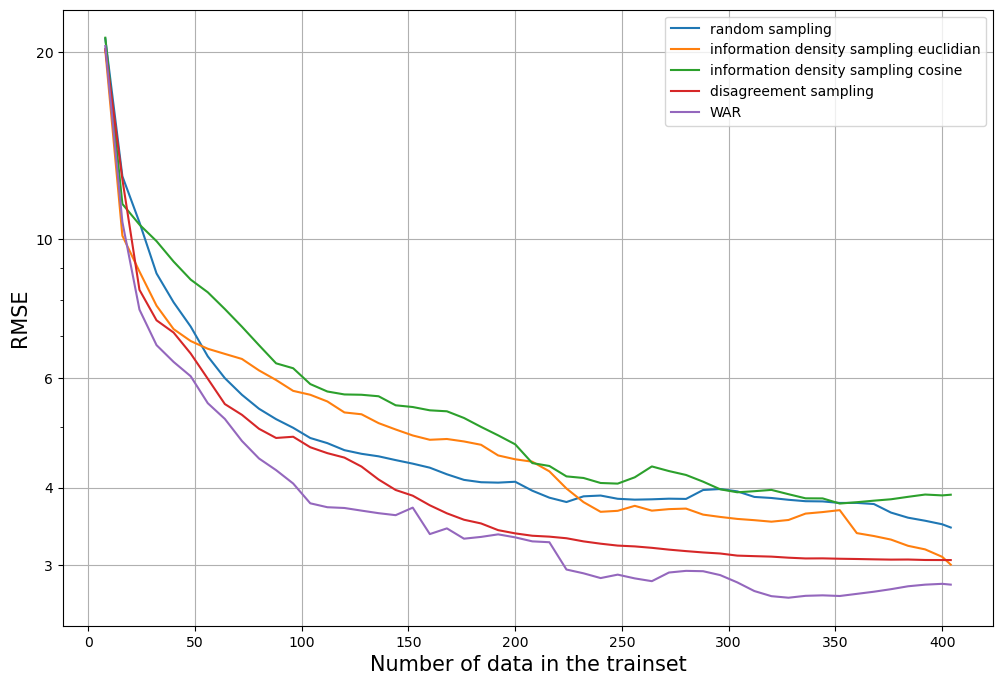

In [42]:
data_each_rounds_boston=list(np.arange(8,404,8))
data_each_rounds_boston.append(404)

plt.figure(figsize=(12,8))
for i,key in enumerate(list(boston.keys())):
    sns.lineplot(x=data_each_rounds_boston,y=boston[key]["RMSE"],label=list(boston.keys())[i]) 
plt.grid(True)
plt.yscale('log')
plt.ylabel("RMSE",fontsize=15)
plt.xlabel("Number of data in the trainset",fontsize=15)
plt.yticks([3,4,6,10,20],[3,4,6,10,20])
plt.legend()
plt.savefig("boston graph benchmark")

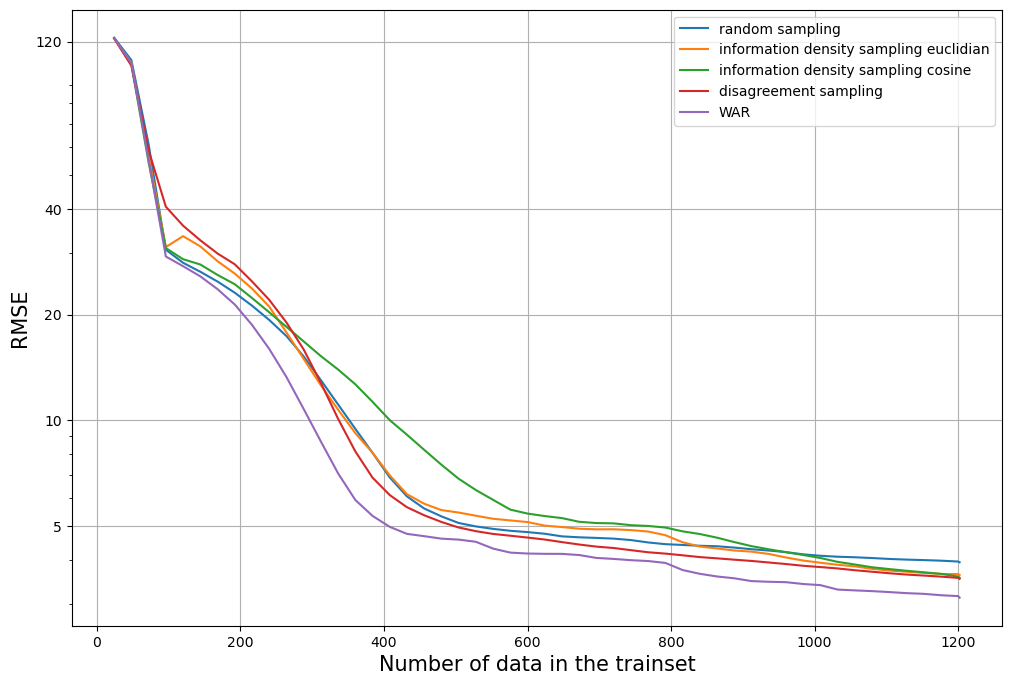

In [43]:
data_each_rounds_airfoil=list(np.arange(24,1202,24))
data_each_rounds_airfoil.append(1202)

plt.figure(figsize=(12,8))
for i,key in enumerate(list(airfoil.keys())):
    plt.plot(data_each_rounds_airfoil,airfoil[key]["RMSE"],label=list(airfoil.keys())[i])
plt.grid(True)
plt.ylabel("RMSE",fontsize=15)
plt.xlabel("Number of data in the trainset",fontsize=15)
plt.yscale('log')
plt.yticks([5,10,20,40,120],[5,10,20,40,120])
plt.legend()
plt.savefig("airfoil graph benchmark")